Correlation analysis between the Ethereum currency and Reddit

In [1]:
import pandas as pd
import numpy as np
# misc
import datetime as dt
from pprint import pprint
from itertools import chain
import redditcleaner
import re

# sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
import spacy

porter = PorterStemmer()
nlp = spacy.load("en_core_web_sm")
# visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8) # default plot size
import seaborn as sns
sns.set(style='whitegrid', palette='Dark2')
from wordcloud import WordCloud
nltk.download('vader_lexicon') # get lexicons data
nltk.download('punkt') # for tokenizer
nltk.download('stopwords')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rameshbabum\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rameshbabum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rameshbabum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
Ethereum_data_TextBlob = pd.read_csv("final_cleaned.csv")
Market_data = pd.read_csv("ethereum_market_data_month_latest.csv")

In [3]:
Ethereum_data_TextBlob['cleaned_discription'] = Ethereum_data_TextBlob['cleaned_discription'].astype(str)

In [4]:
def calculateSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def calculatePolarity(text):
    return TextBlob(text).sentiment.polarity

In [5]:
Ethereum_data_TextBlob['Subjectivity'] = Ethereum_data_TextBlob['cleaned_discription'].apply(calculateSubjectivity)
Ethereum_data_TextBlob ['Polarity'] = Ethereum_data_TextBlob['cleaned_discription'].apply(calculatePolarity)

In [6]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [7]:
Ethereum_data_TextBlob['Analysis'] = Ethereum_data_TextBlob['Polarity'].apply(getAnalysis)

In [8]:
Ethereum_data_TextBlob

,Unnamed: 0,created_utc,title,selftext,Date,cleaned_discription,Subjectivity,Polarity,Analysis
0,0,1.637880e+09,Ethereum Facebook Group acquired - How is that...,I'm a member of the largest public Ethereum gr...,2021-11-25,member largest public ethereum group facebook ...,0.158333,-0.125000,Negative
1,1,1.637880e+09,CRO erc20 is safe?,Hello i have some CRO on an hardware wallet bu...,2021-11-25,hello cro hardwar wallet erc20 cro ethereum to...,0.593750,0.093750,Positive
2,2,1.637878e+09,Write off question!,Hi everyone I'm a sole proprietor in Hawaii US...,2021-11-25,hi everyon sole proprietor hawaii usa year une...,0.316288,0.062247,Positive
3,3,1.637878e+09,MOONX | Low Cap |3m MC | Utility coin for Mark...,MOONX MoonX is a Utility Token that will revi...,2021-11-25,moonx moonx util token revitalis bsc space bri...,0.580357,0.289286,Positive
4,4,1.637878e+09,Macy’s launching Polygon powered commemorative...,Macy’s dropped their first ever NFT collection...,2021-11-25,maci drop first ever nft collect consist 10 un...,0.451948,0.137013,Positive
...,...,...,...,...,...,...,...,...,...
25630,27762,1.619823e+09,Exposing reddit scammers and gaining knowledge!,uOfficialModerator0 and ucoinbasesupport dm'ed...,2021-04-30,uofficialmoderator0 ucoinbasesupport dm ed say...,0.507071,0.045455,Positive
25631,27763,1.619821e+09,Market Cap For Crytpos?,I've been trying to get my head around how hig...,2021-04-30,tri get head around high good boi might go loo...,0.654583,0.307917,Positive
25632,27765,1.619820e+09,Ethereum or Bitcoin?,Hello I’m relatively new to the cryptocurrency...,2021-04-30,hello rel new cryptocurr world invest smaller ...,0.429221,0.012338,Positive
25633,27766,1.619820e+09,Crypto for Beginners - What Everyone Should Know,Hey people of the rCC subreddit So I decided I...,2021-04-30,hey peopl rcc subreddit decid make post due hu...,0.574772,0.075727,Positive


In [9]:
Ethereum_data_TextBlob.Analysis.value_counts()

Positive    18184
Negative     4911
Neutral      2540
Name: Analysis, dtype: int64

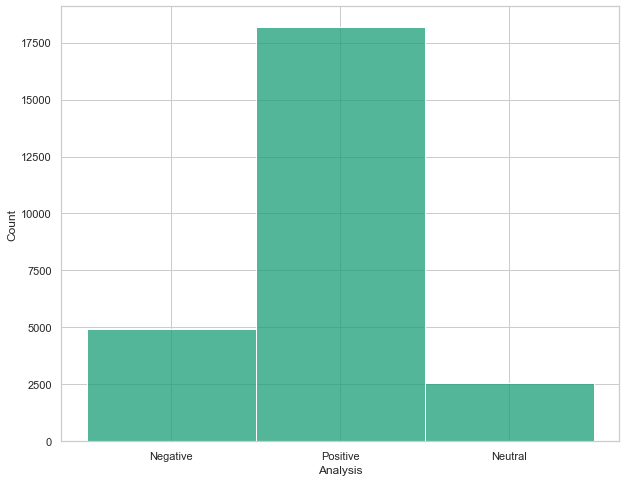

In [10]:
sns.histplot(Ethereum_data_TextBlob.Analysis);

In [11]:
#greater than the start date and smaller than the end date 11/25/2021 09/02/2021
start_date ='2021-09-02'
end_date='2021-11-25'
mask = (Ethereum_data_TextBlob['Date'] >= start_date) & (Ethereum_data_TextBlob['Date'] <= end_date)

In [12]:
df = Ethereum_data_TextBlob.loc[mask]

In [13]:
df.reset_index()

,index,Unnamed: 0,created_utc,title,selftext,Date,cleaned_discription,Subjectivity,Polarity,Analysis
0,0,0,1.637880e+09,Ethereum Facebook Group acquired - How is that...,I'm a member of the largest public Ethereum gr...,2021-11-25,member largest public ethereum group facebook ...,0.158333,-0.125000,Negative
1,1,1,1.637880e+09,CRO erc20 is safe?,Hello i have some CRO on an hardware wallet bu...,2021-11-25,hello cro hardwar wallet erc20 cro ethereum to...,0.593750,0.093750,Positive
2,2,2,1.637878e+09,Write off question!,Hi everyone I'm a sole proprietor in Hawaii US...,2021-11-25,hi everyon sole proprietor hawaii usa year une...,0.316288,0.062247,Positive
3,3,3,1.637878e+09,MOONX | Low Cap |3m MC | Utility coin for Mark...,MOONX MoonX is a Utility Token that will revi...,2021-11-25,moonx moonx util token revitalis bsc space bri...,0.580357,0.289286,Positive
4,4,4,1.637878e+09,Macy’s launching Polygon powered commemorative...,Macy’s dropped their first ever NFT collection...,2021-11-25,maci drop first ever nft collect consist 10 un...,0.451948,0.137013,Positive
...,...,...,...,...,...,...,...,...,...,...
9937,9937,10758,1.630544e+09,Technical Test Reference,The development of SP4C3's first test network ...,2021-09-02,develop sp4c3 first test network progress aita...,0.196825,0.012831,Positive
9938,9938,10759,1.630543e+09,Hey 👋 I’m here to tell you about Boost Coin ⚡️...,Boost Coin is the native cryptocurrency of the...,2021-09-02,boost coin nativ cryptocurr boost ecosystem ad...,0.344872,-0.033333,Negative
9939,9939,10761,1.630543e+09,Coinbase’s Bitcoin (BTC) Outflow Highest Since...,Bitcoin has started off the new month of Septe...,2021-09-02,bitcoin start new month septemb new low seen w...,0.417297,0.011309,Positive
9940,9940,10762,1.630542e+09,www.cyberpatch.news,Hey everyone wanted to shameless plug the Cybe...,2021-09-02,hey everyon want shameless plug cybersecur new...,0.535714,0.285714,Positive


In [14]:
from datetime import datetime
def convertdate(ts):
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

In [15]:
df['Date'] = df['created_utc'].apply(convertdate)

<ipython-input-15-47183eb34072>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['created_utc'].apply(convertdate)


In [16]:
df

,Unnamed: 0,created_utc,title,selftext,Date,cleaned_discription,Subjectivity,Polarity,Analysis
0,0,1.637880e+09,Ethereum Facebook Group acquired - How is that...,I'm a member of the largest public Ethereum gr...,2021-11-25 22:46:41,member largest public ethereum group facebook ...,0.158333,-0.125000,Negative
1,1,1.637880e+09,CRO erc20 is safe?,Hello i have some CRO on an hardware wallet bu...,2021-11-25 22:33:18,hello cro hardwar wallet erc20 cro ethereum to...,0.593750,0.093750,Positive
2,2,1.637878e+09,Write off question!,Hi everyone I'm a sole proprietor in Hawaii US...,2021-11-25 22:13:09,hi everyon sole proprietor hawaii usa year une...,0.316288,0.062247,Positive
3,3,1.637878e+09,MOONX | Low Cap |3m MC | Utility coin for Mark...,MOONX MoonX is a Utility Token that will revi...,2021-11-25 22:07:58,moonx moonx util token revitalis bsc space bri...,0.580357,0.289286,Positive
4,4,1.637878e+09,Macy’s launching Polygon powered commemorative...,Macy’s dropped their first ever NFT collection...,2021-11-25 21:58:39,maci drop first ever nft collect consist 10 un...,0.451948,0.137013,Positive
...,...,...,...,...,...,...,...,...,...
9937,10758,1.630544e+09,Technical Test Reference,The development of SP4C3's first test network ...,2021-09-02 01:01:07,develop sp4c3 first test network progress aita...,0.196825,0.012831,Positive
9938,10759,1.630543e+09,Hey 👋 I’m here to tell you about Boost Coin ⚡️...,Boost Coin is the native cryptocurrency of the...,2021-09-02 00:44:04,boost coin nativ cryptocurr boost ecosystem ad...,0.344872,-0.033333,Negative
9939,10761,1.630543e+09,Coinbase’s Bitcoin (BTC) Outflow Highest Since...,Bitcoin has started off the new month of Septe...,2021-09-02 00:34:14,bitcoin start new month septemb new low seen w...,0.417297,0.011309,Positive
9940,10762,1.630542e+09,www.cyberpatch.news,Hey everyone wanted to shameless plug the Cybe...,2021-09-02 00:22:13,hey everyon want shameless plug cybersecur new...,0.535714,0.285714,Positive


In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']

df_grouped = df.groupby(pd.Grouper(freq='1d'))['Polarity'].sum()

<ipython-input-17-9a2123993374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [18]:
Market_data['Date'] = pd.to_datetime(Market_data['Date'])
Market_data.index = Market_data['Date']

crypto_usd_grouped = Market_data.groupby(pd.Grouper(freq='1d'))['close'].mean()

In [19]:
# crypto_usd_grouped.drop(crypto_usd_grouped.tail(4).index, inplace=True)

In [20]:
len(crypto_usd_grouped)

85

In [21]:
len(df_grouped)

85

In [22]:
import scipy as sp
sp.corrcoef(df_grouped,crypto_usd_grouped)

<ipython-input-22-949cae44f593>:2: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  sp.corrcoef(df_grouped,crypto_usd_grouped)


array([[1.       , 0.6337701],
       [0.6337701, 1.       ]])

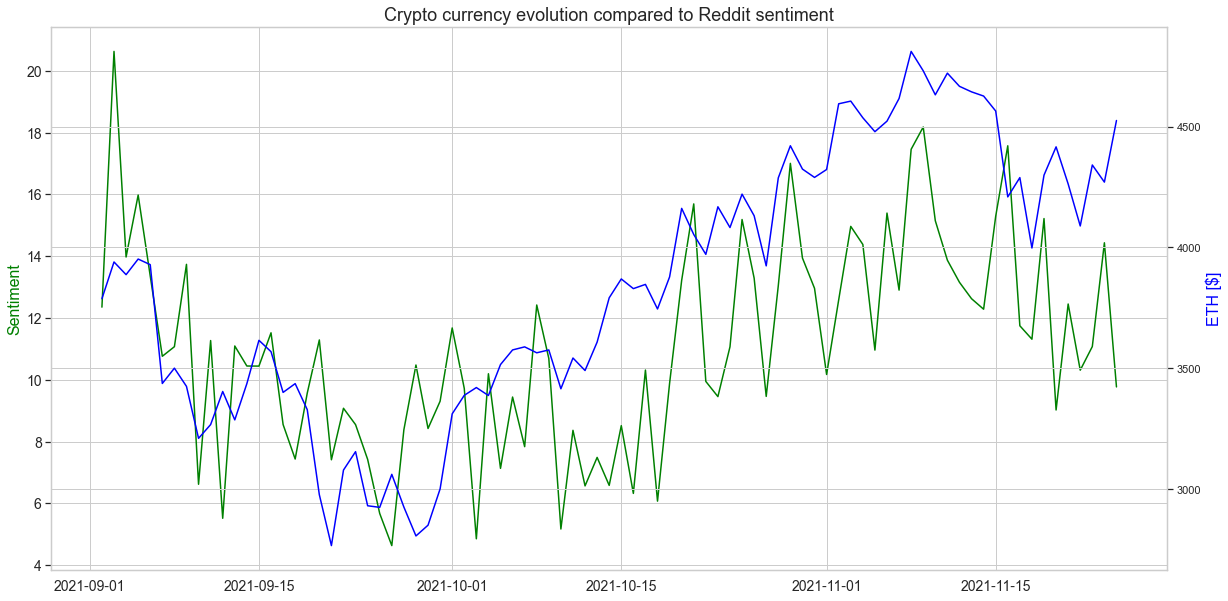

In [23]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to Reddit sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(df_grouped.index, df_grouped, 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel(f"ETH [$]", color='b', fontsize=16)
plt.show()

In [24]:
def crosscorr(datax, datay, lag, method="pearson"):
    return datax.corr(datay.shift(lag), method=method)

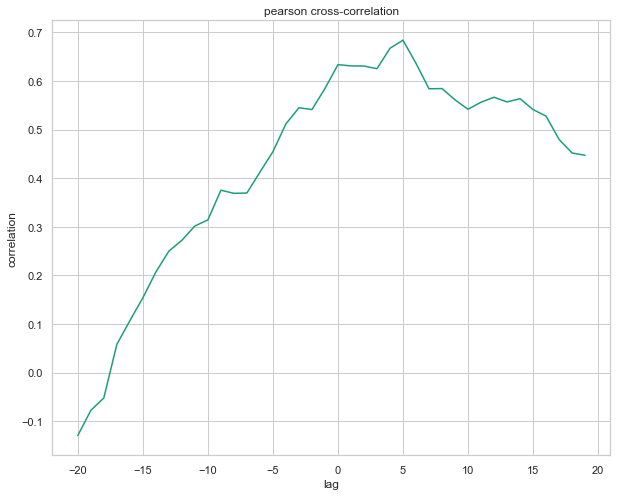

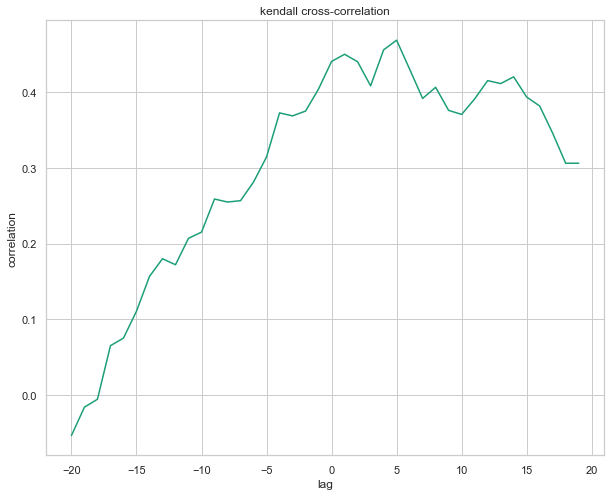

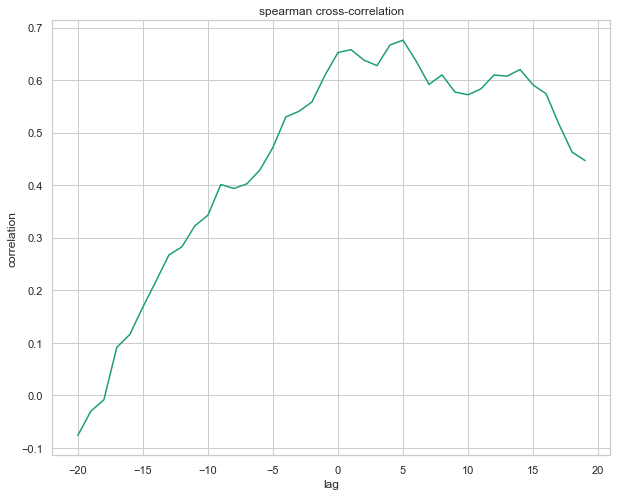

In [25]:
#tweets_grouped.T.corr(crypto_usd_grouped, method='pearson')
#tweets_grouped.T.autocorr(crypto_usd_grouped, lag=20)
xcov = [crosscorr(df_grouped, crypto_usd_grouped, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("pearson cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(df_grouped, crypto_usd_grouped, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("kendall cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(df_grouped, crypto_usd_grouped, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("spearman cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()